### What is the problem/data? 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train  (55000, 784)
validation  (5000, 784)
label (55000, 10)
test  (10000, 784)
What is mnist <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
what is mnist.train.images <class 'numpy.ndarray'>
The digit should be 0


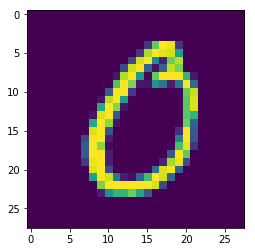

In [2]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist.train/validation/test.images/labels 
print ("train ", mnist.train.images.shape)
print ("validation ", mnist.validation.images.shape)
print ("label", mnist.train.labels.shape)
print ("test ", mnist.test.images.shape)

print ("What is mnist", type(mnist))
print ("what is mnist.train.images", type(mnist.train.images))

nth=888
print ("The digit should be", mnist.train.labels[nth].tolist().index(1))

#plt.imshow(mnist.train.images[nth].reshape(28,28))
plt.imshow(mnist.train.images[nth].reshape(28,28))

#Comments: mnist.train.labels[nth] is the label for nth image, but it
#is a ndarray, which to turn into a list, for which we print out the
#position when the value is 1 (because we know there is only one item in
#the list with value 1 and the rests are all zeros)

In [5]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

### Single Layer NN (FirstContactWithTensorflow)

where are the additional codes needed from tensorflow 

https://github.com/tensorflow/tensorflow/tree/master/tensorflow/
https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist/input_data.py
https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py



In [38]:
# Using single layer to train ... 

# input
x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])

# inference
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([1, 10]))
matm=tf.matmul(x,W)
y = tf.nn.softmax(tf.matmul(x,W) + b)

# loss
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

# training
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# training cycles
sess = tf.Session()
sess.run(tf.global_variables_initializer())

correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_,axis=1)) # y=(m*c) so axis=1 along c
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            
for i in range(500):
    batch_xs, batch_ys = mnist.train.next_batch(6) # mini-batch
    _, y_pred = sess.run((train_step, y), feed_dict={x: batch_xs, y_: batch_ys})
    #print(y_pred)
    #print (sess.run(correct_prediction, feed_dict={x: batch_xs, y_: batch_ys}))
    #print (sess.run(accuracy, feed_dict={x: batch_xs, y_: batch_ys}))
    
# Validation (using test set to evaluate the accuracy: there are 10000 images in it
#print (len(sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))
print()
print("training complete!")
print (sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


training complete!
0.8464


### Multilayer (Convolution Net)

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf

x  = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

x_image = tf.reshape(x, [-1,28,28,1])
print "x_image=", x_image

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# *******************************************************************
# DONT Run it here or it will crash the computer. Run it on unix env.
# *******************************************************************


for i in range(40):
    batch = mnist.train.next_batch(5)
    if i%10 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))

    sess.run(train_step,feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"% sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))


### Visualization of the weight parameters: what is learnt?

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)

y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

In [ ]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

masks = []
for i in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(30)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    masks.append(sess.run(W)) # save the intermediate weights

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

And now the visualization:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

plt.rcParams['image.cmap'] = 'gray'

def view_mask(number, learning_iteration):
    data = np.transpose(masks[learning_iteration])[number]
    pos = map(lambda x: x if x > 0 else 0, data)
    neg = map(lambda x: x if x < 0 else 0, data)
    pos /= np.amax(pos)
    neg /= np.amin(neg)
    data = pos - neg
    image = np.split(data, 28)
    plt.imshow(image);

interact(view_mask, number=(0,9), learning_iteration=(0, len(masks) - 1))